## 날짜별 워드 클라우드로 가장 빈도수 높은 단어 도출 (title)
- 이예빈

In [4]:
import pandas as pd
import numpy as np
import re
from konlpy.tag import Okt
import numpy as np
import pandas as pd
import re
import json
import os
import glob
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import MeCab
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split


In [23]:
try:
    if not(os.path.isdir('./tokenized_news')):
        os.makedirs(os.path.join('./tokenized_news'))
                    
except OSError as e:
    if e.errno != errno.EEXIST:
        print("Failed to create directory!")
        raise

In [24]:
data_news = pd.read_csv('./1-8월 뉴스.csv', encoding='utf-8')
data_news

,title,text,url,media,date
0,무너지는 일과 삶의 경계···노동이 녹아내린다,이 땅에서 ‘비정규직’이라는 표현이 광범위하게 쓰인 지 20여년. 정부가 신규 일자...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
1,일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\n노동의 미래를 모두 알 수는 없다. 다만 현실에서 일어나...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
2,이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동],ㆍ①일자리보다 일거리\n\nㆍAI 학습데이터 가공 기업 ‘크라우드웍스’ 교육장 참관...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
3,"지혜씨, 지훈씨를 부탁해! [인포그래픽]",새로 태어나는 아이들은 줄어들고 어르신들은 계속 나이를 먹어 갑니다. 2020년 새...,https://news.naver.com/main/read.nhn?mode=LPOD...,경향신문,2020-01-01
4,"[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”",새천년의 시작과 함께 세상에 나온 2000년대생들이 어느덧 사회 변화를 이끌 20대...,https://news.naver.com/main/read.nhn?mode=LPOD...,국민일보,2020-01-01
...,...,...,...,...,...
29036,"""2.5단계로 무급휴가 요구""… 코로나 재유행에 살아난 '갑질'",직장인 A씨는 수도권 사회적 거리두기 2.5단계를 시행하는 30일부터 다음달 6일...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29037,모호한 조치ㆍ 깜깜이 환자 비율 40%육박... 거리두기 2.5단계 효과 있을까,"30일 0시부터 서울 전역에 강화된 사회적 거리두기(2.5단계)가 시행됐지만, 전문...",https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29038,내일부터 서울 시내버스 밤 9시 이후 20% 감축… 주말 수준으로,수도권의 ‘사회적 거리두기’ 2.5단계 시행 기간에 맞춰 서울 시내버스의 야간 운행...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31
29039,집단휴업 두고 전공의 vs 정부 '강대강 대치'... 의료공백 장기화 불가피,21일부터 10일째 무기한 집단휴진을 이어가고 있는 전공의(인턴ㆍ레지던트)들과 정부...,https://news.naver.com/main/read.nhn?mode=LPOD...,한국일보,2020-08-31


In [42]:
### 뉴스 제목에서 기호 제거 & 명사 추출 

def title_preprocessing(title, okt):
    title_text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]', ' ', title)
    word_title = okt.nouns(title_text) 
#     word_title = [word for word in word_title if not word in stopwords] # 불용어 제거
    
    return word_title

In [52]:
### 전처리된 데이터프레임 by_day를 반환합니다. 
## file: csv파일이 들어있는 경로를 지정해주세요. (+ 파일까지 포함되도록!)

def all_preprocessing(file):
    df_file = pd.read_csv(file, encoding='utf-8')
    
    title = df_file['title']
    date_ = df_file['date']
    df = pd.DataFrame({'title':title, 'date':date_})
    
    okt = Okt()
    clean_text = []
    for title in df_file['title']:
        if type(title)==str:
            clean_text.append(title_preprocessing(title, okt))
        else:
            clean_text.append([])
    df['title'] = clean_text
    
    # date 컬럼 -> datetime으로 설정 
    df['date'] = pd.to_datetime(df['date'])
#     # date 컬럼을 index로 지정 
#     df.index = df['date'].values
    # 날짜 형식 재정의
#     df['date'] = df['date'].strftime('%Y-%m-%d')
#     # date 컬럼 삭제 
#     df.drop(['date'], axis=1, inplace=True)
    # 날짜별로 묶기 
    by_day = df.groupby(df['date']).sum()


    # 일별로 중복된 단어 제거 
#     split_title_list = []
#     for i in range(len(by_day['title'])):
#         split_title_list.append(set(by_day['title'][i]))

#     by_day['title'] = split_title_list
    
    # 딕셔너리 풀기
    title_text = []
    for i in range(len(by_day['title'])):
        title_text.append(', '.join(by_day['title'][i]))

    by_day['title'] = title_text 
    
    return by_day

In [53]:
tmp_ = all_preprocessing('./1-8월 뉴스.csv')

In [54]:
tmp_

,title
date,
2020-01-01,"일과, 삶, 경계, 노동, 일자리, 일거리, 정치, 노동, 곳, 기계, 정확도, 인..."
2020-01-02,"김정은, 머, 새, 전략, 무기, 목격, 것, 북, 노동당, 전원, 회의, 결정, ..."
2020-01-03,"엽서, 쿡방, 팬시, 팬덤, 밀레, 얼, 기억, 법, 외교부, 이라크, 정세, 불안..."
2020-01-04,"계란, 피라미드, 를, 커버, 스토리, 공습, 이란혁명, 수비대, 실세, 사망, 미..."
2020-01-05,"월, 일, 서울, 세계, 최악, 도시, 위, 전, 날, 새해, 운동, 결심, 이유,..."
...,...
2020-08-27,"업무, 명령, 의료, 총파업, 강행, 또, 트럼프, 월, 미국, 대선, 가지, 관전..."
2020-08-28,"거리, 두기, 단계, 코로나, 재, 확산, 의, 정, 대화, 단절, 속, 응급, 중..."
2020-08-29,"의사, 파업, 속, 의정부, 부산, 응급실, 환자, 지병, 악화, 아베, 일본, 총..."


In [ ]:
tmp_

(-0.5, 799.5, 599.5, -0.5)

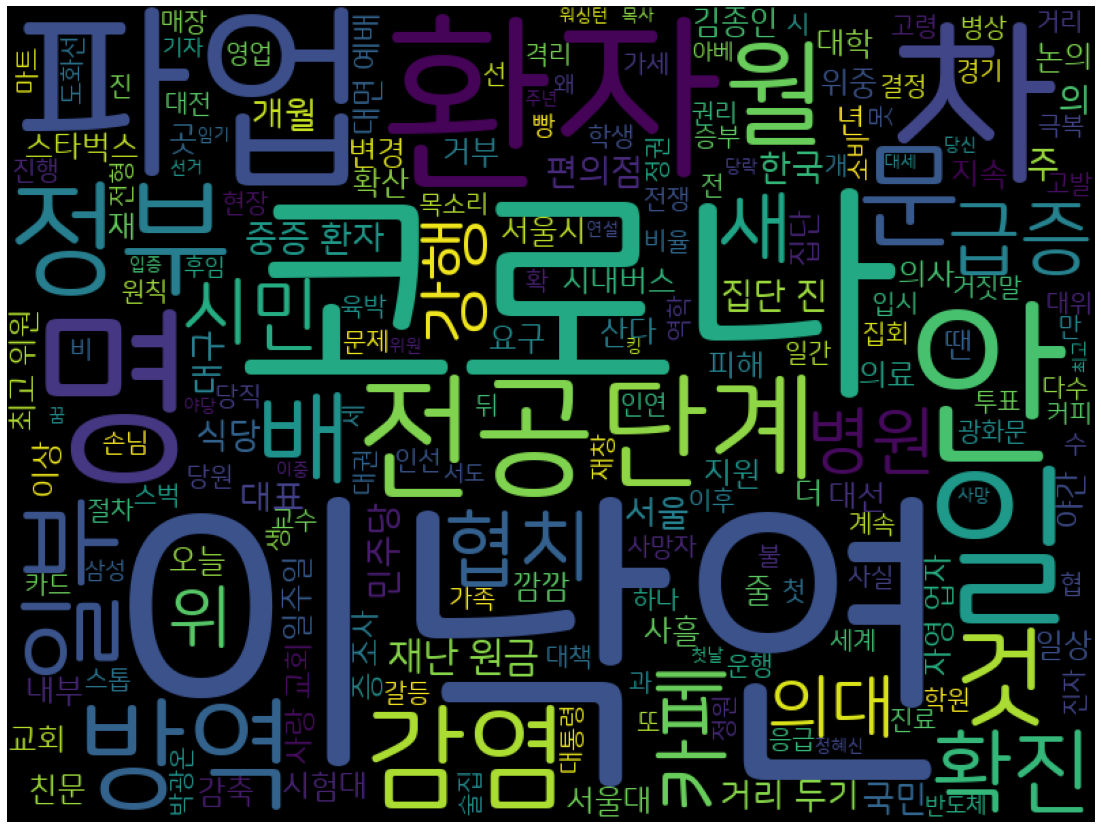

In [59]:
cloud = WordCloud(
      font_path='../../fonts/NanumSquareRoundR.ttf'
    , width=800
    , height=600
).generate(tmp_['title']['2020-08-31'])

plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [31]:
[[x_train,x_test],[Y_train,Y_test]] = train_test_split(data_news,test_size=0.2)

ValueError: too many values to unpack (expected 2)

In [9]:
bb = aa['media']

In [10]:
set(bb)

{'경향신문', '국민일보', '동아일보', '문화일보', '서울신문', '세계일보', '조선일보', '중앙일보', '한겨레', '한국일보'}

In [13]:
import MeCab

In [19]:
# m = MeCab.Tagger()

title_ = list(aa['title'])
# title_ = m.parse(aa['title'])

In [20]:
title_

['무너지는 일과 삶의 경계···노동이 녹아내린다',
 "일자리 아닌 일거리···'일정치 않음'을 살다 [녹아내리는 노동]",
 '이곳은…기계의 정확도 높이는 ‘인간부품’ 육성공장 아닐까 [녹아내리는 노동]',
 '지혜씨, 지훈씨를 부탁해! [인포그래픽]',
 '[20대 리포트] “20대, 함부로 판단말라… 내 길 내가 간다”',
 '[포토] 인간과 로봇의 만남, 공존·번영의 새해 꿈꾸며…',
 '[알림] 새해 국민일보  더욱 새로워집니다',
 '트럼프는 ‘경제 호황’ 기대감, 민주당은 ‘트럼프 때리기’',
 '“누가 더 못하나” 답없는 여야, 불어난 산토끼가 승부 가른다',
 '[20대 리포트] “없는 길 만드는 스타트업… 패기는 기본, 땀은 필수죠”',
 '[20대 리포트] 모두가 가는 대학 대신, 나만의 길 찾아 “세상 속으로”',
 '“공무원증 밥값 결제” 혁신賞 준 정부',
 '[더 나은 100년을 준비합니다]민주의 열망과 시대의 동력으로 동아일보가 태어났노라',
 '“조국, 靑 최강욱 명의 아들 인턴증명 위조”',
 '동아일보 창간 100주년 기획',
 '미래 100년 향해 펼쳐진 순백의 평원… 이야기를 채워주세요',
 '[알립니다]2020 동아일보 신춘문예 당선작',
 '“PC에 다 있어” 인수인계 끝… 경험 축적은커녕 매번 원점으로',
 '“야망충 되기 싫다… 보람만 포기하면 갓9급”',
 '다짜고짜 반말에 얼평-몸평까지… 꼰대에 절망하는 청년들',
 '꼰대독립선언서…“라테 이즈 호스 지긋지긋… 이제는 귀 열고 들어주세요”',
 '다시 희망, 우리가 바꿀 미래',
 '키도 실력도 쑥쑥… 탁구 신동, 이에리사·현정화 뛰어넘는다',
 '2020 도쿄올림픽을 향하여… 대한민국 국가대표 ‘파이팅’',
 '[사고] 서울신문 2020 신춘문예 당선작',
 '[새해 여론조사] 비례 47석 중 정의당 28석… 연동형 폭발력 나오나',
 '[새해 여론조사] 10명 중 4명 “현역 안 뽑겠다”… 63% “386 대신 젊은 후보”',
 '[새해 여론조사] 20대 절

In [21]:
m = MeCab.Tagger()

RuntimeError: 

In [ ]:
(train_data, train_labels), (test_data, test_labels) = a